# Visualize the results from a set of predictions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RESULTS_FILE = "output/results_df_2021-8-5_1015.csv"

In [3]:
results = pd.read_csv(RESULTS_FILE)

In [4]:
results.head()

,Bin,Language,Source,F1
0,1,Italian,langid,0.00
1,1,Italian,langdetect,0.50
2,1,English,langid,1.00
3,1,English,langdetect,0.29
4,1,Korean,langid,0.00


In [5]:
bin_labels = ["1","2","3","4","5","6","7","8","9","10","11 to 16", "17 to 27", "28 to 48", "49 to 99"]

In [6]:
results_langid = results[results["Source"]=="langid"]
results_langid_pivot = results_langid.pivot_table(values="F1", index="Language", columns="Bin")
results_langid_pivot = results_langid_pivot[bin_labels]
results_langid_pivot.loc["Average"] = results_langid_pivot.mean()
# results_langid_pivot.head()

results_langdetect = results[results["Source"]=="langdetect"]
results_langdetect_pivot = results_langdetect.pivot_table(values="F1", index="Language", columns="Bin")
results_langdetect_pivot = results_langdetect_pivot[bin_labels]
results_langdetect_pivot.loc["Average"] = results_langdetect_pivot.mean()
# results_langdetect_pivot.head()

In [7]:
sns.set_style("darkgrid")
title_font = {"fontweight":"bold", "fontsize":14}
label_fonts = {"fontweight":"bold", "fontsize":12}

# create custom colormap for consistent colors
language_cmap = {}
language_cmap["Average"] = (0.8901960784313725, 0.10196078431372549, 0.10980392156862745) # red-orange

language_cmap["Chinese"] = (0.5545098039215688, 0.7564167627835449, 0.8683121876201461) # blue
language_cmap["Japanese"] = (0.21568627450980393, 0.5294117647058824, 0.7542483660130719) # blue
language_cmap["Korean"] = (0.06251441753171857, 0.35750865051903113, 0.6429065743944637) # blue

language_cmap["French"] = (0.5739331026528259, 0.8241753171856978, 0.5606151480199923) # green
language_cmap["Italian"] = (0.21568627450980393, 0.6287581699346405, 0.3333333333333333) # green
language_cmap["Spanish"] = (0.04359861591695502, 0.4648212226066897, 0.20369088811995384) # green
language_cmap["Portuguese"] = (0.7792233756247597, 0.9132333717800846, 0.7518031526336024) # green

language_cmap["English"] = (0.698961937716263, 0.6965013456362938, 0.8372164552095348) # purple
language_cmap["Danish"] = (0.47320261437908495, 0.43267973856209146, 0.6993464052287581) # purple
language_cmap["German"] = (0.3568166089965398, 0.20525951557093425, 0.5856978085351787) # purple
language_cmap["Dutch"] = (0.38, 0.41, 0.8) # purple?
language_cmap["Norwegian"] = (0.48, 0.51, 0.7) # purple?

# create custom dash dict for consistent dashes
language_dashes = {}
language_dashes["Average"] = (1, 1)

language_dashes["Chinese"] = (2, 1)
language_dashes["Japanese"] = (4, 3)
language_dashes["Korean"] = (6, 6)

language_dashes["French"] = (2, 1)
language_dashes["Italian"] = (4, 3)
language_dashes["Spanish"] = (6, 6)
language_dashes["Portuguese"] = (8, 12)

language_dashes["English"] = (2, 1)
language_dashes["Danish"] = (4, 3)
language_dashes["German"] = (6, 6)
language_dashes["Dutch"] = (8, 12)
language_dashes["Norwegian"] = (10, 16)

## Plot averages

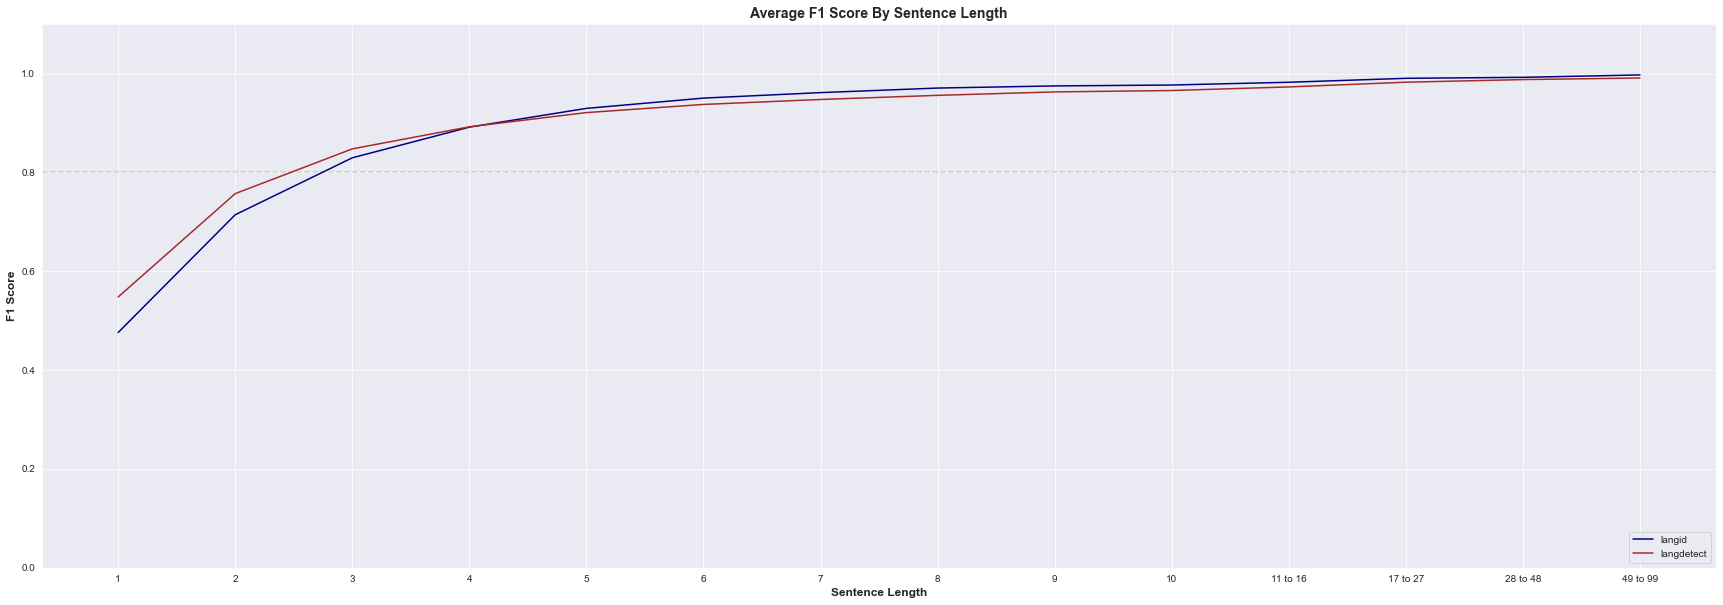

In [8]:
plt.figure(figsize=(30,10))
plt.title("Average F1 Score By Sentence Length", fontdict=title_font)
plt.xlabel("Sentence Length", fontdict=label_fonts)
plt.ylabel("F1 Score", fontdict=label_fonts)
plt.ylim(0.0, 1.1)
plt.axhline(y=0.8, linestyle="--", color="gray", alpha=0.3);
sns.lineplot(data=results_langid_pivot.loc["Average"].T, color="navy", label="langid");
sns.lineplot(data=results_langdetect_pivot.loc["Average"].T, color="brown", label="langdetect");
plt.legend(loc="lower right");
plt.savefig("output/overall_average_scores.png")

## Plot all results

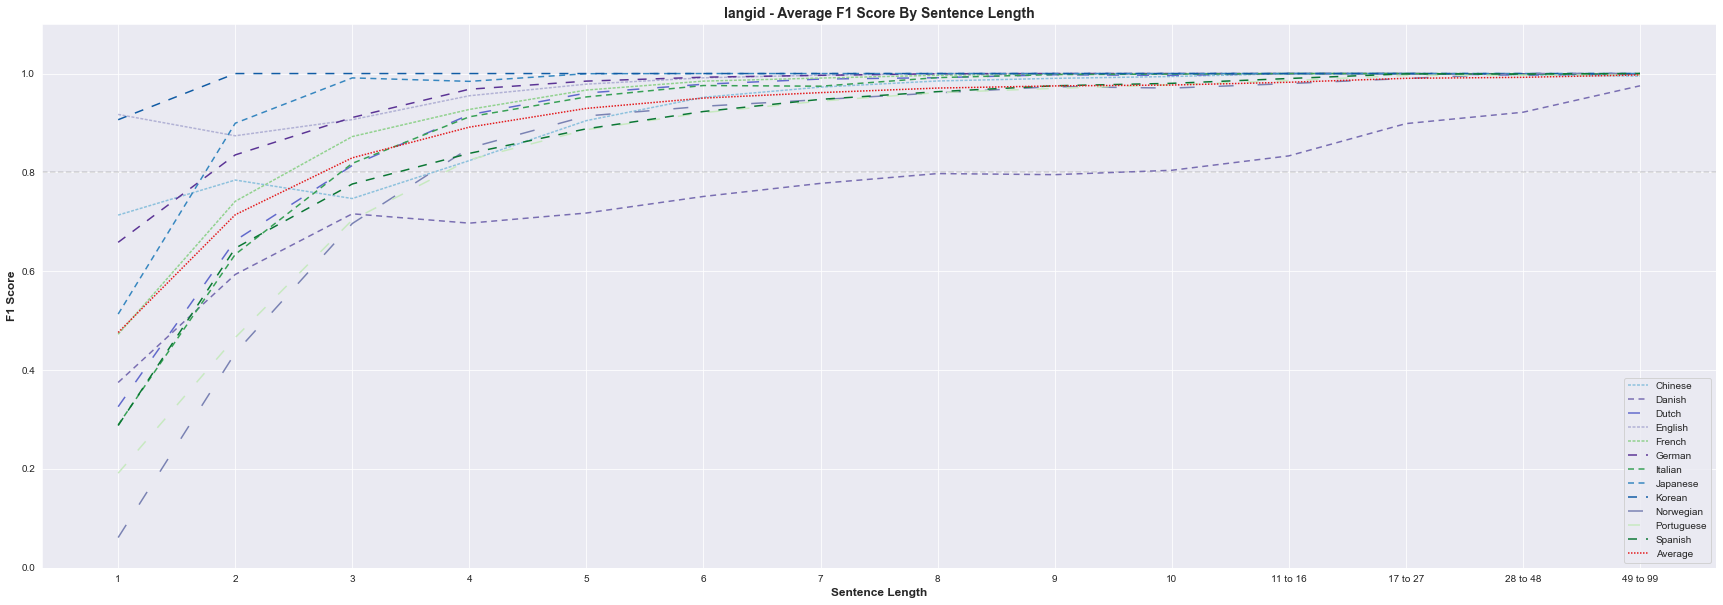

In [9]:
plt.figure(figsize=(30,10))
plt.title("langid - Average F1 Score By Sentence Length", fontdict=title_font)
plt.xlabel("Sentence Length", fontdict=label_fonts)
plt.ylabel("F1 Score", fontdict=label_fonts)
plt.ylim(0.0, 1.1)
plt.axhline(y=0.8, linestyle="--", color="gray", alpha=0.3);
sns.lineplot(data=results_langid_pivot.T, palette=language_cmap, dashes=language_dashes);
plt.legend(loc="lower right");
plt.savefig("output/langid_overall_average_scores.png")

## Chinese, Japanese, Korean

In [10]:
THESE_LANGUAGES = ["Chinese", "Japanese", "Korean"]

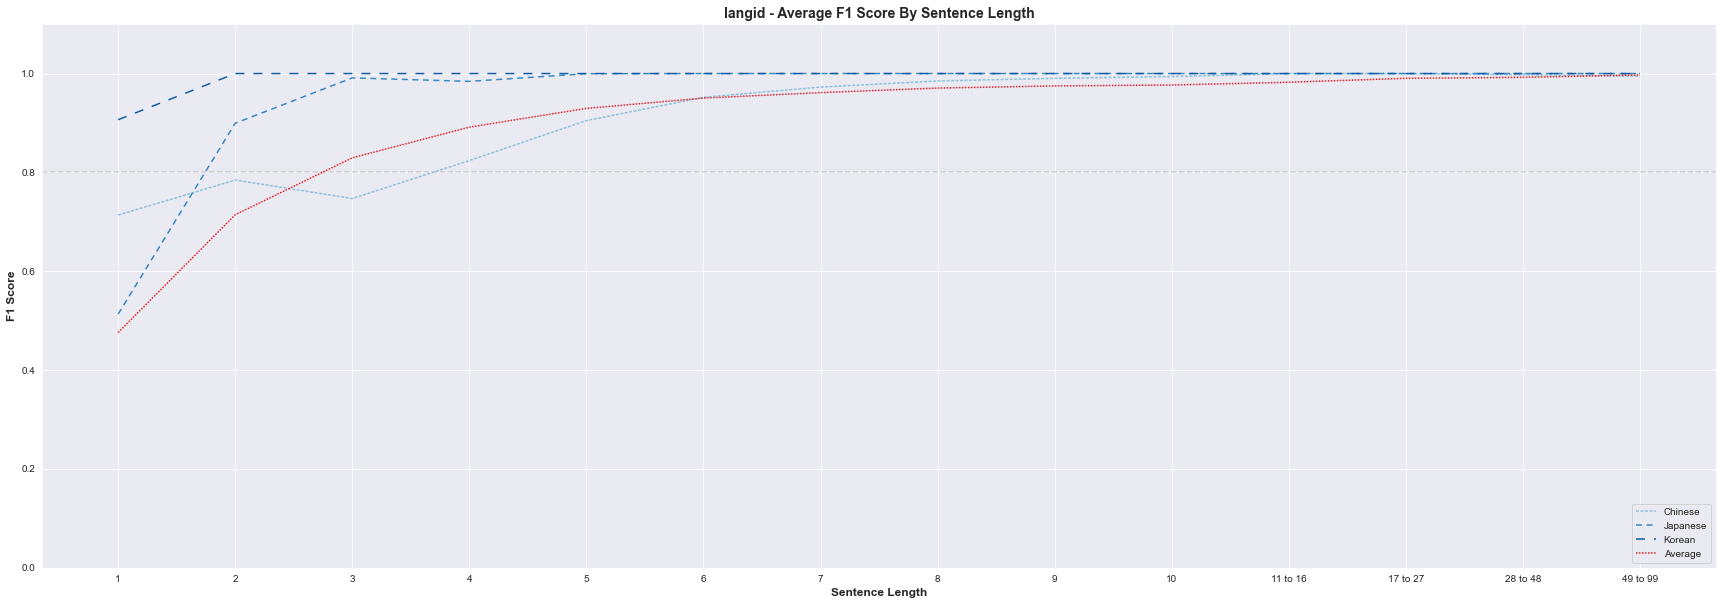

In [11]:
plt.figure(figsize=(30,10))
plt.title("langid - Average F1 Score By Sentence Length", fontdict=title_font)
plt.xlabel("Sentence Length", fontdict=label_fonts)
plt.ylabel("F1 Score", fontdict=label_fonts)
plt.ylim(0.0, 1.1)
plt.axhline(y=0.8, linestyle="--", color="gray", alpha=0.3);
sns.lineplot(data=results_langid_pivot.loc[THESE_LANGUAGES+["Average"]].T, palette=language_cmap, dashes=language_dashes);
plt.legend(loc="lower right");

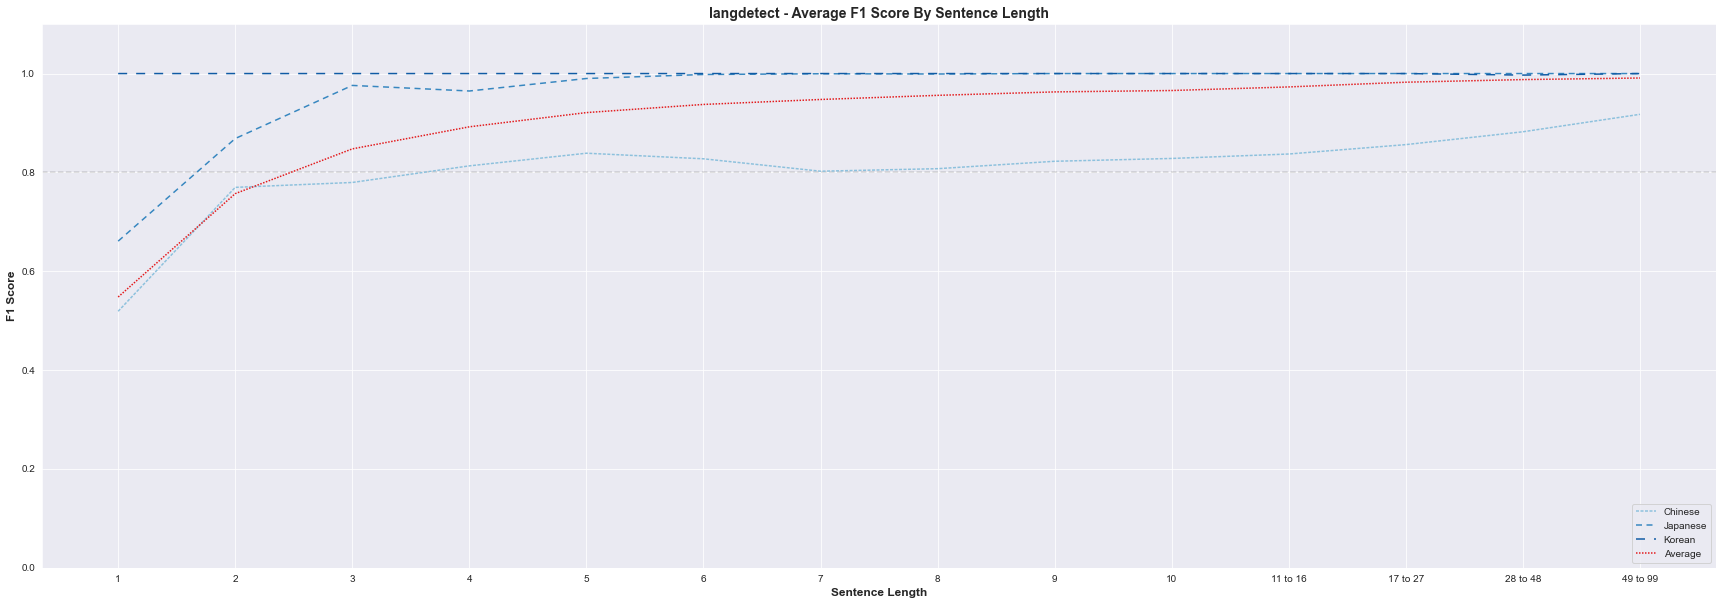

In [12]:
plt.figure(figsize=(30,10))
plt.title("langdetect - Average F1 Score By Sentence Length", fontdict=title_font)
plt.xlabel("Sentence Length", fontdict=label_fonts)
plt.ylabel("F1 Score", fontdict=label_fonts)
plt.ylim(0.0, 1.1)
plt.axhline(y=0.8, linestyle="--", color="gray", alpha=0.3);
sns.lineplot(data=results_langdetect_pivot.loc[THESE_LANGUAGES+["Average"]].T, palette=language_cmap, dashes=language_dashes);
plt.legend(loc="lower right");

## Danish, Dutch, English, & German

In [13]:
THESE_LANGUAGES = ['Danish', "Dutch", 'English', 'German', 'Norwegian']

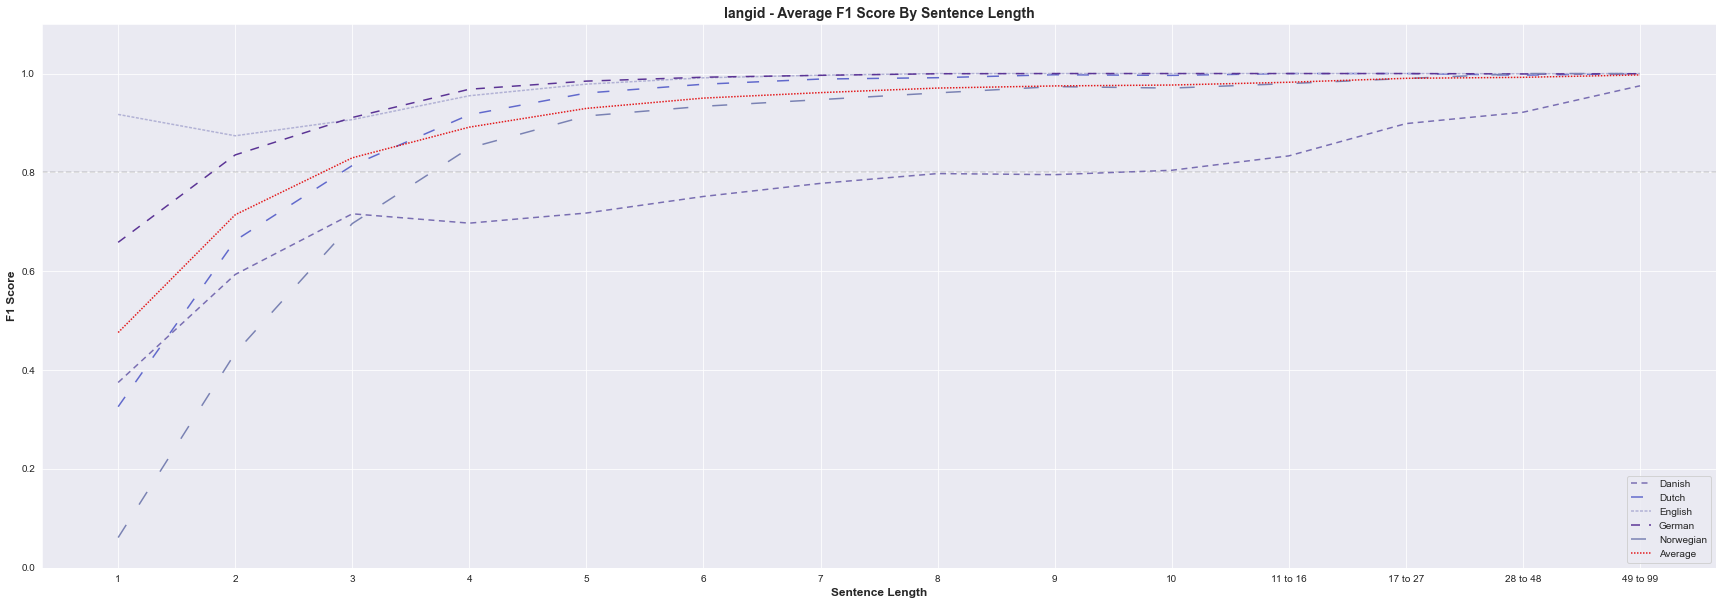

In [14]:
plt.figure(figsize=(30,10))
plt.title("langid - Average F1 Score By Sentence Length", fontdict=title_font)
plt.xlabel("Sentence Length", fontdict=label_fonts)
plt.ylabel("F1 Score", fontdict=label_fonts)
plt.ylim(0.0, 1.1)
plt.axhline(y=0.8, linestyle="--", color="gray", alpha=0.3);
sns.lineplot(data=results_langid_pivot.loc[THESE_LANGUAGES+["Average"]].T, palette=language_cmap, dashes=language_dashes);
plt.legend(loc="lower right");

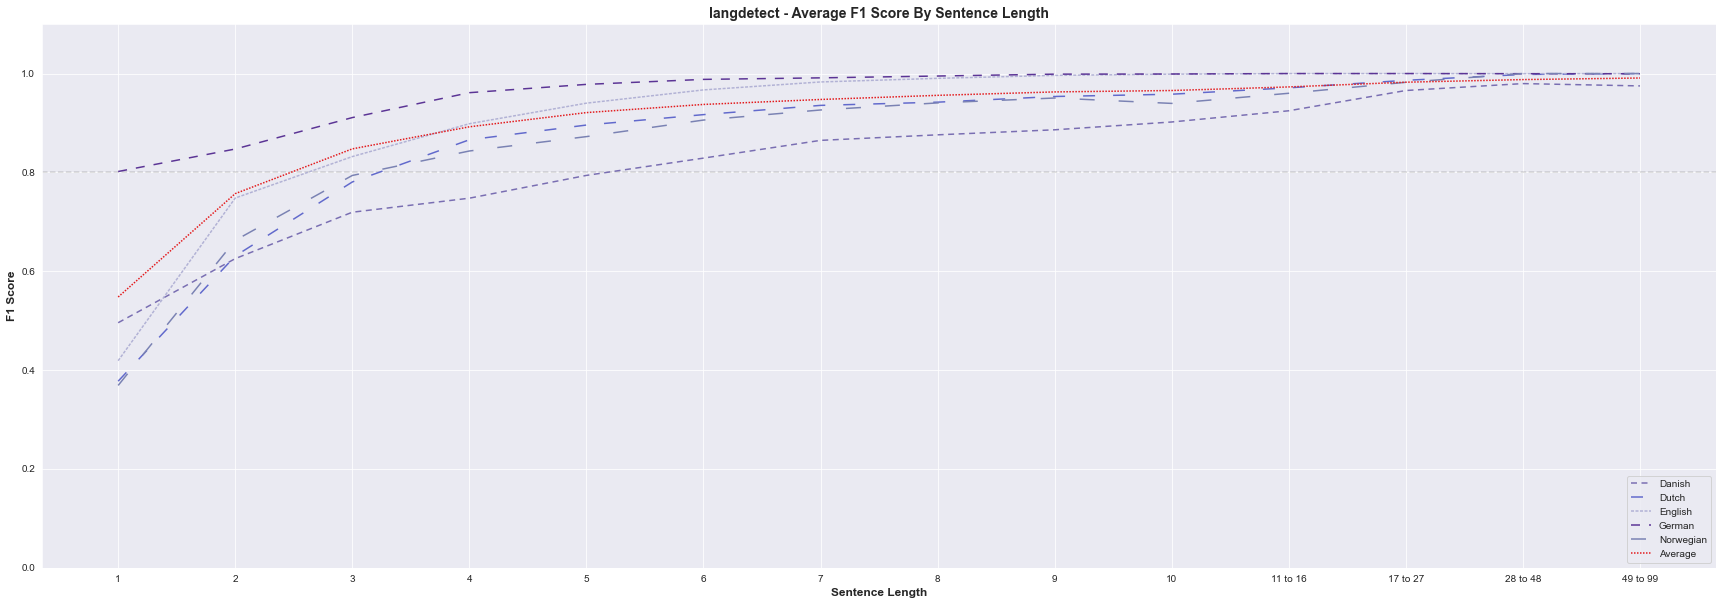

In [15]:
plt.figure(figsize=(30,10))
plt.title("langdetect - Average F1 Score By Sentence Length", fontdict=title_font)
plt.xlabel("Sentence Length", fontdict=label_fonts)
plt.ylabel("F1 Score", fontdict=label_fonts)
plt.ylim(0.0, 1.1)
plt.axhline(y=0.8, linestyle="--", color="gray", alpha=0.3);
sns.lineplot(data=results_langdetect_pivot.loc[THESE_LANGUAGES+["Average"]].T, palette=language_cmap, dashes=language_dashes);
plt.legend(loc="lower right");

## French, Italian, Portuguese, & Spanish

In [16]:
THESE_LANGUAGES = ['French', 'Italian', 'Portuguese', 'Spanish']

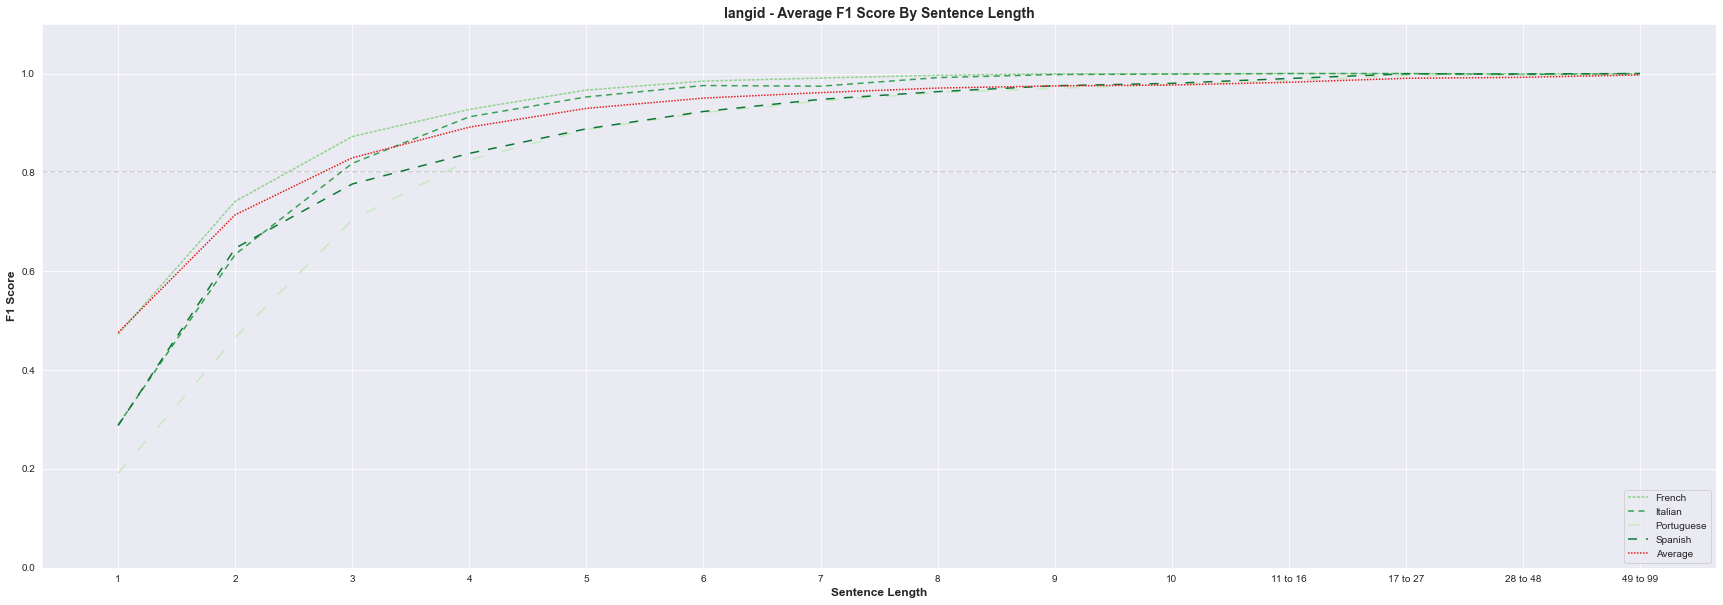

In [17]:
plt.figure(figsize=(30,10))
plt.title("langid - Average F1 Score By Sentence Length", fontdict=title_font)
plt.xlabel("Sentence Length", fontdict=label_fonts)
plt.ylabel("F1 Score", fontdict=label_fonts)
plt.ylim(0.0, 1.1)
plt.axhline(y=0.8, linestyle="--", color="gray", alpha=0.3);
sns.lineplot(data=results_langid_pivot.loc[THESE_LANGUAGES+["Average"]].T, palette=language_cmap, dashes=language_dashes);
plt.legend(loc="lower right");

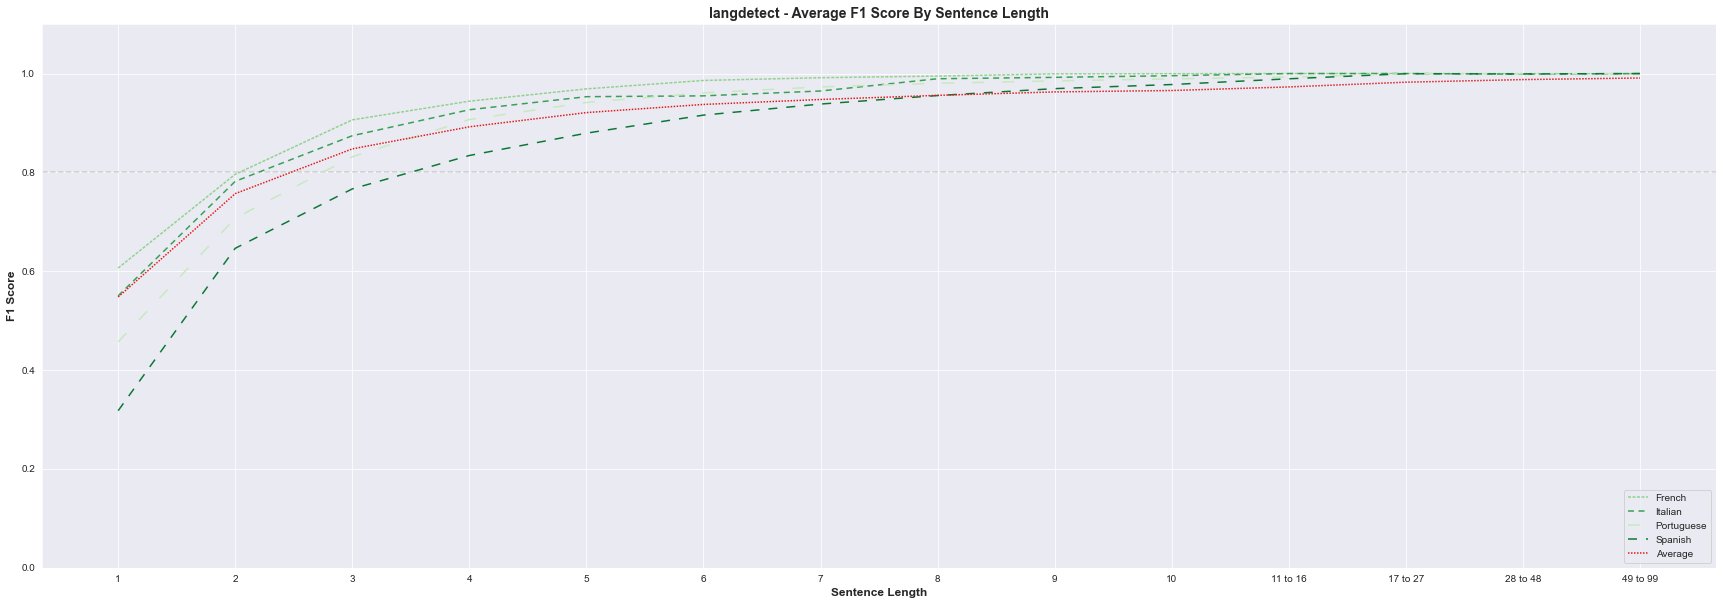

In [18]:
plt.figure(figsize=(30,10))
plt.title("langdetect - Average F1 Score By Sentence Length", fontdict=title_font)
plt.xlabel("Sentence Length", fontdict=label_fonts)
plt.ylabel("F1 Score", fontdict=label_fonts)
plt.ylim(0.0, 1.1)
plt.axhline(y=0.8, linestyle="--", color="gray", alpha=0.3);
sns.lineplot(data=results_langdetect_pivot.loc[THESE_LANGUAGES+["Average"]].T, palette=language_cmap, dashes=language_dashes);
plt.legend(loc="lower right");

## Find the number of chars needed to achieve F1=0.8 & 0.9

In [19]:
_80 = results_langid_pivot.apply(lambda row: row[row > 0.79].index[0], axis=1)
_90 = results_langid_pivot.apply(lambda row: row[row > 0.89].index[0], axis=1)
results_langid_pivot["First Bin >= 0.8"] = _80
results_langid_pivot["First Bin >= 0.9"] = _90
results_langid_pivot

Bin,1,2,3,4,5,6,7,8,9,10,11 to 16,17 to 27,28 to 48,49 to 99,First Bin >= 0.8,First Bin >= 0.9
Language,,,,,,,,,,,,,,,,
Chinese,0.7136,0.784500,0.747100,0.823900,0.904800,0.952000,0.972600,0.98500,0.990300,0.994000,0.999900,1.000000,0.99750,0.994700,4,5
Danish,0.3749,0.593400,0.716200,0.697300,0.717800,0.751300,0.777800,0.79760,0.795400,0.804300,0.833400,0.898700,0.92170,0.975200,8,17 to 27
Dutch,0.3259,0.662200,0.814000,0.916700,0.960600,0.978400,0.988900,0.99160,0.997600,0.996300,1.000000,1.000000,0.99680,1.000000,3,4
English,0.9173,0.874100,0.906700,0.955100,0.978600,0.991400,0.996700,1.00000,1.000000,1.000000,1.000000,1.000000,0.99960,1.000000,1,1
French,0.4725,0.741500,0.872500,0.927400,0.966600,0.984700,0.990900,0.99650,0.999500,0.999600,1.000000,1.000000,0.99960,0.999700,3,4
German,0.6585,0.835400,0.911100,0.968300,0.984700,0.992600,0.996400,0.99960,1.000000,1.000000,1.000000,1.000000,0.99920,0.999600,2,3
Italian,0.2892,0.634000,0.818300,0.912500,0.952700,0.975800,0.974400,0.99180,0.998000,0.998900,1.000000,1.000000,0.99800,1.000000,3,4
Japanese,0.5133,0.899500,0.991200,0.984200,0.999700,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2,2
Korean,0.9066,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1,1


In [20]:
results_langid_pivot["First Bin >= 0.8"].sort_values()

Language
English       1
Korean        1
German        2
Japanese      2
Dutch         3
French        3
Italian       3
Average       3
Chinese       4
Norwegian     4
Portuguese    4
Spanish       4
Danish        8
Name: First Bin >= 0.8, dtype: object

In [21]:
results_langid_pivot["First Bin >= 0.9"].sort_values()

Language
English              1
Korean               1
Danish        17 to 27
Japanese             2
German               3
Dutch                4
French               4
Italian              4
Average              4
Chinese              5
Norwegian            5
Portuguese           6
Spanish              6
Name: First Bin >= 0.9, dtype: object

In [22]:
_80 = results_langdetect_pivot.apply(lambda row: row[row > 0.79].index[0], axis=1)
_90 = results_langdetect_pivot.apply(lambda row: row[row > 0.89].index[0], axis=1)
results_langdetect_pivot["First Bin >= 0.8"] = _80
results_langdetect_pivot["First Bin >= 0.9"] = _90
results_langdetect_pivot

Bin,1,2,3,4,5,6,7,8,9,10,11 to 16,17 to 27,28 to 48,49 to 99,First Bin >= 0.8,First Bin >= 0.9
Language,,,,,,,,,,,,,,,,
Chinese,0.519000,0.769700,0.779600,0.813200,0.838800,0.8275,0.80240,0.8075,0.822500,0.828200,0.837200,0.8562,0.8822,0.917500,4,49 to 99
Danish,0.495800,0.625500,0.719400,0.747800,0.793900,0.8289,0.86480,0.8760,0.886200,0.902000,0.924700,0.9657,0.9797,0.975000,5,10
Dutch,0.377500,0.630800,0.780600,0.866000,0.895800,0.9169,0.93560,0.9421,0.953600,0.958200,0.971100,0.9863,0.9982,1.000000,4,5
English,0.419000,0.748100,0.832000,0.898500,0.940100,0.9669,0.98300,0.9903,0.996300,0.998800,1.000000,1.0000,0.9998,1.000000,3,4
French,0.606500,0.796200,0.906300,0.944100,0.969000,0.9860,0.99160,0.9949,0.999400,0.999700,1.000000,1.0000,0.9998,0.999700,2,3
German,0.801800,0.847300,0.910900,0.961300,0.978100,0.9882,0.99130,0.9950,0.998800,0.999100,1.000000,1.0000,0.9997,0.999600,1,3
Italian,0.550300,0.781900,0.874200,0.926800,0.953200,0.9549,0.96470,0.9895,0.992300,0.995600,1.000000,1.0000,0.9988,1.000000,3,4
Japanese,0.660900,0.868500,0.976000,0.964700,0.990000,0.9981,0.99960,0.9991,1.000000,1.000000,1.000000,1.0000,1.0000,1.000000,2,3
Korean,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.00000,1.0000,1.000000,1.000000,1.000000,1.0000,0.9969,1.000000,1,1


In [23]:
results_langdetect_pivot["First Bin >= 0.8"].sort_values()

Language
German        1
Korean        1
French        2
Japanese      2
English       3
Italian       3
Norwegian     3
Portuguese    3
Average       3
Chinese       4
Dutch         4
Spanish       4
Danish        5
Name: First Bin >= 0.8, dtype: object

In [24]:
results_langdetect_pivot["First Bin >= 0.9"].sort_values()

Language
Korean               1
Danish              10
French               3
German               3
Japanese             3
English              4
Italian              4
Portuguese           4
Average              4
Chinese       49 to 99
Dutch                5
Norwegian            6
Spanish              6
Name: First Bin >= 0.9, dtype: object

# End